**Проект: Статистический анализ данных**

# Анализ данных о некоторых пользователях из нескольких городов, а также об их поездках сервиса аренды самокатов GoFast.

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей. 


- с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.



**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv:
- user_id - уникальный идентификатор пользователя,
- name - имя пользователя,
- age - возраст,
- city - город,
- subscription_type - тип подписки (free, ultra).


Поездки — rides_go.csv:
- user_id - уникальный идентификатор пользователя,
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах),
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»,
- date - дата совершения поездки.


Подписки — subscriptions_go.csv:
- subscription_type - тип подписки,
- minute_price - стоимость одной минуты поездки по данной подписке,
- start_ride_price - стоимость начала поездки,
- subscription_fee - стоимость ежемесячного платежа.

**План**

1.Ознакомление с данными:
- Загрузка данных;
- Изучение общей информации о датафрейме.
2.Предобработка данных:
- Работа с пропущенными значениями и дубликатами;
- Приведение столбцов к необходимым типам;
- Создание нового столбца.
3.Исследовательский анализ данных:
- Описание и визуализация данных:частота встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние, которое пользователь преодолел за одну поездку, продолжительность поездок.
4.Объединение данных:
- Объедининение данных о пользователях, поездках и подписках в один датафрейм.
- Создание двух датафреймов:c данными о пользователях без подписки, с данными о пользователях с подпиской.
- Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.
5.Подсчет выручки:
- Создание датафрейма с агрегированными данными о поездках
- Добавление столбца с помесячной выручкой, которую принёс каждый пользователь. 
6. Проверка гипотез:
- Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. 
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Выше ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
7.Распределения
- Выяснение  минимального количества промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 
- Оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial
from IPython.display import display

In [5]:
# Отображение всех колонок таблиц
pd.set_option('display.max_columns', None)

## Шаг. Загрузка данных

###  Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [6]:
# функция вывода информации о датасете
def dataset_info(dataset):
    print(dataset.info())
    display(dataset.head())

In [7]:
#Сохраним в датафреймы основные данные
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')


### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

**Пользователи — users_go.csv**

In [8]:
# Изучим общую информацию о датафрейме users
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [9]:
#Посмотрим общую информацию о датафрейме users по распределению значений в каждом столбце
users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [10]:
#Посмотрим явные пропуски датафрейме users
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Вывод первого этапа по датафрейме users.

- уникальный идентификатор пользователя (user_id) представлен целыми числами (int),
- имя пользователя (name) представленно строковыми значениями (object),
- возраст (age) пользователя представлен целыми числами (int),
- город (city) пользователя представлен строковыми значениями (object),
- тип подписки (subscription_type) пользователя представлен строковыми значениями (object).

Минимальный возраст пользователя 12 лет, средний возраст - 25 лет, максимальный возраст - 43 года.

Нет пропущенных значений в данных о Пользователях (датафрейм users).

**Поездки — rides_go.csv**

In [11]:
# Изучим общую информацию о датафрейме rides
display(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

In [12]:
#Посмотрим общую информацию о датафрейме rides по распределению значений в каждом столбце
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [13]:
#Посмотрим явные пропуски датафрейме rides
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Вывод первого этапа по датафрейм rides.

- пользователь (user_id), представлен целыми числами (int),
- расстояние поездки (distance), представлено вещественными числами (float),
- продолжительность поездки в минутах (duration), представлена вещественными числами (float),
- дата поездки (date), представлена строковыми значениями (object), а не datetime.

Минимальное расстояние для сессии пользователя составляет 0,85 м., максимальное - 7211 м., среднее расстояние -3070 м. 

Минимальная продолжительность сессии пользователя составляет 0,5 мин., максимальное - 40 мин.

Нет пропущенных значений  в данных о Поездках (датафрейм rides).

**Подписки — subscriptions_go.csv**

In [14]:
# Изучим общую информацию о датафрейме subscriptions
display(subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

In [15]:
#Посмотрим общую информацию о датафрейме subscriptions по распределению значений в каждом столбце
subs.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [16]:
#Посмотрим явные пропуски датафрейме subscriptions
subs.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод первого этапа для датафрейм subscriptions.

- тип подписки (subscription_type) представлен строковыми значениями (object), 
- стоимость одной минуты поездки по данной подписке (minute_price) представлена  целыми числами (int),
- стоимость начала поездки (start_ride_price)представлена  целыми числами (int),
- стоимость ежемесячного платежа (subscription_fee)представлена  целыми числами (int).

Минимальная стоимость одной минуты составляет 6 руб., максимальная - 8 руб., среднее значение - 7 руб..

Минимальная стоимость ежемесячного платежа составлет 0 руб., максимальняа - 199 руб., среднее значение - 99,5 руб..

Пропусков данных в данных о Подписках (датафрейм subscriptions) нет.

**Вывод первого шага**.

Пользователи — users_go.csv:
- уникальный идентификатор пользователя (user_id) представлен целыми числами (int),
- имя пользователя (name) представленно строковыми значениями (object),
- возраст (age) пользователя представлен целыми числами (int),
- город (city) пользователя представлен строковыми значениями (object),
- тип подписки (subscription_type) пользователя представлен строковыми значениями (object).

Поездки — rides_go.csv:
- пользователь (user_id), представлен целыми числами (int),
- расстояние поездки (distance), представлено вещественными числами (float),
- продолжительность поездки в минутах (duration), представлена вещественными числами (float),
- дата поездки (date), представлена строковыми значениями (object), а не datetime.

Подписки — subscriptions_go.csv:
- тип подписки (subscription_type) представлен строковыми значениями (object),
- стоимость одной минуты поездки по данной подписке (minute_price) представлена целыми числами (int),
- стоимость начала поездки (start_ride_price)представлена целыми числами (int),
- стоимость ежемесячного платежа (subscription_fee)представлена целыми числами (int).


Минимальная стоимость одной минуты составляет 6 руб., максимальная - 8 руб., среднее значение - 7 руб..
Минимальная стоимость ежемесячного платежа составлет 0 руб., максимальняа - 199 руб., среднее значение - 99,5 руб..
Минимальное расстояние для сессии пользователя составляет 0,85 м., максимальное - 7211 м., среднее расстояние -3070 м. 
Минимальная продолжительность сессии пользователя составляет 0,5 мин., максимальное - 40 мин.
Минимальный возраст пользователя 12 лет, средний возраст - 25 лет, максимальный возраст - 43 года.


Все датафреймы загрузились без ошибок. В данных отсутствуют пропуски.



## Шаг. Предобработка данных

### Приведем столбец date к типу даты pandas.

In [17]:
# Преобразование столбца 'date' в тип datetime
rides['date'] = pd.to_datetime(rides['date'])

In [18]:
# Проверим проведенную замену типа в датафрейме rides
display(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

### Создадим новый столбец с номером месяца на основе столбца date.

In [19]:
#Добавим столбец month - месяц  
rides['month'] = rides['date'].dt.month 
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим, за какой период имеются данные.


In [20]:
# Определение минимальной и максимальной даты в датафрейме
min_date = rides['date'].min()
max_date = rides['date'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


Данные в датафрейм rides взяты за период с 01.01.2021 по 30.12.2021.

2.3. Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

**Пользователи — users_go.csv**

- user_id - уникальный идентификатор пользователя,
- name - имя пользователя,
- age - возраст,
- city - город,
- subscription_type - тип подписки (free, ultra).

In [21]:
#Выведем количество пропущенных значений для каждого столбца датафрейме users
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [22]:
# Проверим количество явных дубликатов датафрейме users
users.duplicated().sum()

31

In [23]:
#Удалим дубликаты в датафрейме users
users = users.drop_duplicates()
print('Количество явных дубликатов в датафрейме users:', users.duplicated().sum())

Количество явных дубликатов в датафрейме users: 0


Пропущенные значения и явные дубликаты в данных о Пользователях (датафрейм users) отсутствуют.

**Поездки — rides_go.csv**

- user_id - уникальный идентификатор пользователя,
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах),
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»,
- date - дата совершения поездки.

In [24]:
#Выведем количество пропущенных значений для каждого столбца датафрейме rides
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [25]:
# Проверим количество явных дубликатов датафрейме rides
rides.duplicated().sum()

0

Пропущенные значения и явные дубликаты в данных о Поездках (датафрейм rides) отсутствуют.

**Подписки — subscriptions_go.csv**

- subscription_type - тип подписки,
- minute_price - стоимость одной минуты поездки по данной подписке,
- start_ride_price - стоимость начала поездки,
- subscription_fee - стоимость ежемесячного платежа.

In [26]:
#Выведем количество пропущенных значений для каждого столбца датафрейме subs
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [27]:
# Проверим количество явных дубликатов датафрейме subs
rides.duplicated().sum()

0

Пропущенные значения и явные дубликаты в данных о Подписках (датафрейм subs) отсутствуют.

**Вывод второго шага.**

- Провели предобработку данных.
- Обнаружили и удалили дубликаты в датафрейме Пользователи.
- Изменили тип в столбце date на datetime.
- Создали новый столбец month с номером месяца на основе столбца date.

## Шаг. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

###  Опишем и визуализируем частоту встречаемости городов.

In [28]:
#Оценим данные в столбце city
print('Список уникальных наименований населенных пунктов:', len(users['city'].unique()))
print(users['city'].value_counts())

Список уникальных наименований населенных пунктов: 8
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


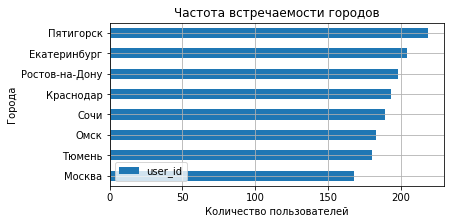

In [29]:
#Выведем горизонтальную столбчатую диаграмму
users_city = users.pivot_table(index='city', values='user_id', aggfunc='count')
users_city = users_city.sort_values(by='user_id', ascending=True)
users_city.plot(kind='barh', figsize=(6, 3), grid=True)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.legend(loc='lower left')
plt.show()


In [30]:
#Отсортирует пользователей в порядке убывания 
display(users_city.sort_values(by='user_id', ascending = False))

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Информация предоставлена по 8 городам, из которых самое большое количество пользователей в Пятигорске (219 пользователей), наименьшее количество - в Москве (168 пользователй).

### Опишем и визуализируем соотношение пользователей с подпиской и без подписки.

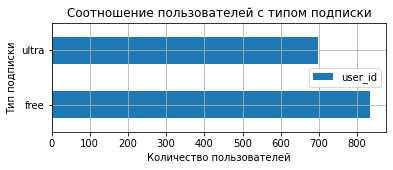

In [31]:
#Создадим горизонтальную столбчатую диаграмму с соотношением пользователей с разными типами подписок
users_subscriptions = users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
users_subscriptions.plot(x = 'subscription_type', kind='barh', figsize = (6,2), grid = True )
plt.title('Соотношение пользователей с типом подписки')
plt.xlabel('Количество пользователей')
plt.ylabel('Тип подписки')
plt.show()

Создадим круговую диаграмму с отображением соотношения групп пользователей.

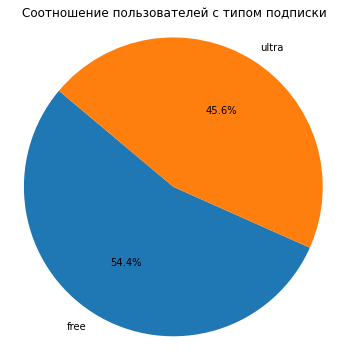

In [32]:
labels = users_subscriptions['subscription_type']
# Создание данных для круговой диаграммы
sizes = users_subscriptions['user_id']

# Создание круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Соотношение пользователей с типом подписки')
plt.axis('equal')  

# Отображение круговой диаграммы
plt.show()

In [33]:
display(users_subscriptions)

,subscription_type,user_id
0,free,835
1,ultra,699


Пользователей с типом подписки "без подписки" больше (835 или 54.4% подписчиков), чем с "с подпиской Ultra" (699 или 45.6% подписчиков).

### Опишем и визуализируем возраст пользователей.

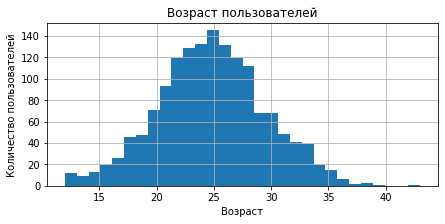

In [34]:
#Создадим гистограмму, которая покажет распределение возраста пользователей
users['age'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

In [35]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Наименьший возраст пользователя - 12 лет, наибольший возраст - 43 года, средний возраст 24,9 лет. Медиана 25 лет и средний возраст 24,9 лет практически совпадают.

### Опишем и визуализируем расстояние, которое пользователь преодолел за одну поездку.

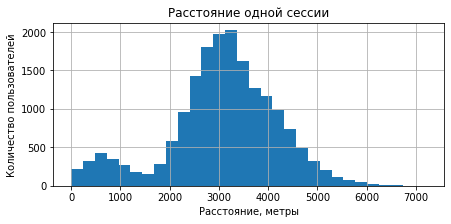

In [36]:
#Создадим гистограмму, которая покажет расстояние, которое преодолел пользователь за одну сессию
rides['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Расстояние одной сессии')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество пользователей')
plt.show()

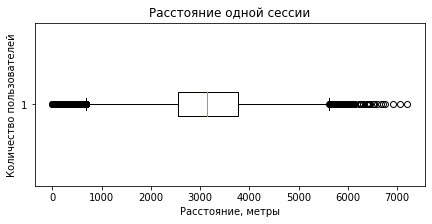

In [37]:
# Создаем ящик с усами для расстояний одной сессии
plt.figure(figsize=(7, 3))
plt.boxplot(rides['distance'], vert=False)

plt.title('Расстояние одной сессии')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество пользователей')
plt.show()

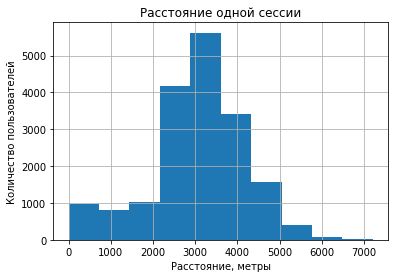

In [38]:
rides['distance'].hist()
plt.title('Расстояние одной сессии')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество пользователей')
plt.show()

In [39]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Максимальное расстояние, которое преодолели пользователи за одну сессию составляет 7211 м., минимальное - 0,85 м., среднее - 3070 м.Есть небольшой всплеск на дистанции 600 м., а так же большое средне отклонение, по которому можно предположить, что на длину сессии могут оказывать влияние маршрут (поездка до метро или остановки общественного транспорта, стоянки самокатов), погодные условия (использовали самокат для дистанции от остановки до остановки около дома), работоспособность самоката (самокат оказался с дефектом в работе и был возвращен на стоянку, заряд батареи), время суток (время в часы пик).

### Опишем и визуализируем продолжительность поездок.

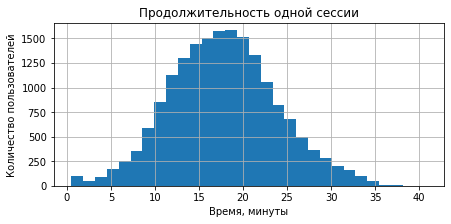

In [40]:
#Создадим гистограмму, которая покажет продолжительность сессии пользователей
rides['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Продолжительность одной сессии')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.show()

Увеличим значение bins до 100 и построим гистограмму, оценим данные и уточним вывод.

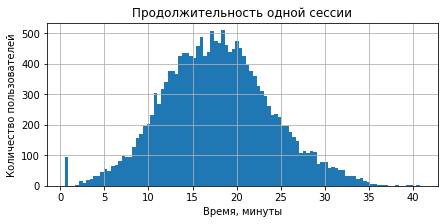

In [41]:
# Увеличиваем значение параметра bins
rides['duration'].plot(kind='hist', grid=True, figsize=(7, 3), bins=100)

# Добавляем заголовок графика
plt.title('Продолжительность одной сессии')

# Добавляем подписи к осям
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')

# Отображаем график
plt.show()

На гистограмме виден всплеск в районе первых нескольких минут. Можно предположить, что пользователь оценил работоспособность самоката и прекратил сессию. Таким образом, около 100 пользователей в течение года приостановили сессию в течение первых двух минут. 

 Проверим предположение, что пользователи без подписки приостанавливали сессию по причине не работоспособности самоката. 

In [42]:
#Объединим два датафрейма чтобы посчитать дистанцию в первые 3 мин.для пользователй без подписки
data_mrg_duration = rides.copy()
data_mrg_duration = data_mrg_duration.merge(users, how = 'left', on = 'user_id' )
display(data_mrg_duration)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [43]:
# Фильтрация данных поездок для пользователей без подписки и длительности поездок не более 3 минут
short_rides_free_users = data_mrg_duration[(data_mrg_duration['duration'] <= 3) & (data_mrg_duration['subscription_type'] == 'free')]
# Определение средней дистанции за первые 3 минуты для каждой поездки пользователей без подписки
distance_in_first_3_min_free = short_rides_free_users['distance'].mean()
print("Средняя дистанция за первые 3 минуты для пользователей без подписки:", distance_in_first_3_min_free)

Средняя дистанция за первые 3 минуты для пользователей без подписки: 3848.920522045692


Предположение, что пользователи без подписки, заканчивали сессию в первые 3 минуты из-за не работоспособности самоката не состоятелен, потому что средняя дистанция составила 3848 м. Предположим, что самокат использовался на короткие дистанции (до метро, до общественного транспорта).

In [44]:
# Фильтрация данных поездок для пользователей без подписки и длительности поездок не более 1 минуты
short_rides_free_users = data_mrg_duration[(data_mrg_duration['duration'] <= 1) & (data_mrg_duration['subscription_type'] == 'free')]
distance_in_first_3_min_free = short_rides_free_users['distance'].mean()
print("Средняя дистанция за первую минуту для пользователей без подписки:", distance_in_first_3_min_free)

Средняя дистанция за первую минуту для пользователей без подписки: 5113.176548536017


Предположим, что пользователь без подписки старался проехать максимальную дистанцию за одну минуту, потому что данный тариф предлагает "первую минуту бесплатно". Этим может быть объяснен данный пик в  данных.

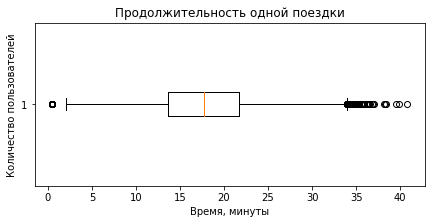

In [45]:
# Создаем ящик с усами для расстояний одной сессии
plt.figure(figsize=(7, 3))
plt.boxplot(rides['duration'], vert=False)

plt.title('Продолжительность одной поездки')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.show()

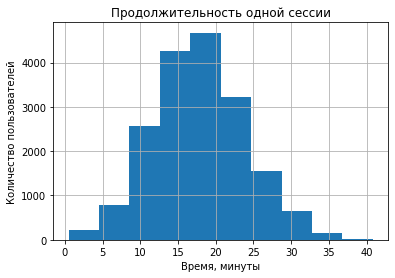

In [46]:
rides['duration'].hist()
plt.title('Продолжительность одной сессии')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.show()

In [47]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Максимальная продолжительность одной сессии составляет 40 минут, минимальная продолжительность - 0,5 минут, средняя продолжительность - 17,8 минут. Есть отклонение в 6, которое возникло по наличию небольшого количества длительных сессии. Но в основном самокат используют до 20 минут.
Виден всплеск в районе первых нескольких минут сесии. Таким образом, около 100 пользователей в течение года приостановили сессию в течение первых двух минут.

**Вывод третьего шага.**

- Информация в датафреймах предоставлена по 8 городам, из которых самое большое количество пользователей в Пятигорске (219 пользователей), наименьшее количество - в Москве (168 пользователй).
- Пользователей с типом подписки "без подписки" больше (835 подписчиков), чем с "с подпиской Ultra" (699 подписчиков).
- Наименьший возраст пользователя - 12 лет, наибольший возраст - 43 года, средний возраст 24,9 лет. Медиана 25 лет и средний возраст 24,9 лет практически совпадают.
- Максимальное расстояние, которое преодолели пользователи за сессию составляет 7211 м., минимальное - 0,85 м., среднее - 3070 м.Есть небольшой всплеск на дистанции 600 м., а так же большое средне отклонение, по которому можно предположить, что на длину сессии могут оказывать влияние маршрут (поездка до метро или остановки общественного транспорта, стоянки самокатов), погодные условия (использовали самокат для дистанции от остановки до остановки около дома), работоспособность самоката (самокат оказался с дефектом в работе и был возвращен на стоянку, не заряженная батарея), время суток (время в часы пик).
- Максимальная продолжительность одной сессии составляет 40 минут, минимальная продолжительность - 0,5 минут, средняя продолжительность - 17,8 минут. Есть отклонение в 6, которое возникло по наличию небольшого количества длительных сессии. Но в основном самокат используют до 20 минут. Около 100 пользователей в течение года приостановили сессию в течение первых двух минут, предположим, что пользователь без подписки старался проехать максимальную дистанцию за одну минуту, потому что данный тариф предлагает "первую минуту бесплатно". Этим может быть объяснен данный пик в данных.

## Шаг. Объединение данных

###  Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [48]:
data_mrg = rides.copy()
data_mrg = data_mrg.merge(users, how = 'left', on = 'user_id' )
data_mrg = data_mrg.merge(subs, how = 'left', on='subscription_type')
display(data_mrg)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Получили объединенный датафрейм с 12 колонками и 18068 строками.

Сравним количество строк полученной таблицы с количеством строк таблиц до объединения, проверим наличие пропусков.

In [49]:
num_rows_users = users.shape[0]
num_rows_rides = rides.shape[0]
num_rows_subs = subs.shape[0]
display("Количество строк в датафрейме users:", num_rows_users)
display("Количество строк в датафрейме rides:", num_rows_rides)
display("Количество строк в датафрейме subs:", num_rows_subs)

'Количество строк в датафрейме users:'

1534

'Количество строк в датафрейме rides:'

18068

'Количество строк в датафрейме subs:'

2

Количество строк в объединенном датафрейме data_mrg составляет 18068 строк, исходный датафрейм rides содержал больше строк, чем датафреймы users и subs, и при объединении создались дополнительные строки для соответствия каждой строке из rides строкой из users и subs.

In [50]:
# Проверка наличия дубликатов в DataFrame
if data_mrg.duplicated().any():
    print("В data_mrg есть дубликаты.")
else:
    print("В data_mrg нет дубликатов.")

В data_mrg нет дубликатов.


In [51]:
# Проверка наличия пропусков в DataFrame
if data_mrg.isnull().any().any():
    print("В data_mrg есть пропуски.")
else:
    print("В data_mrg нет пропусков.")

В data_mrg нет пропусков.


### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки, с данными о пользователях с подпиской.

In [52]:
#Создадим датафрейм о пользователях без подписки
data_mrg_free = data_mrg[data_mrg['subscription_type'] == 'free']
display(data_mrg_free.head())
print('Количество строк в датафрейме data_mrg_free:', data_mrg_free.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Количество строк в датафрейме data_mrg_free: 11568


In [53]:
#Создадим датафрейм о пользователях с подпиской 
data_mrg_ultra = data_mrg[data_mrg['subscription_type'] == 'ultra']
display(data_mrg_ultra.head())
print('Количество строк в датафрейме data_mrg_ultra:', data_mrg_ultra.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Количество строк в датафрейме data_mrg_ultra: 6500


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

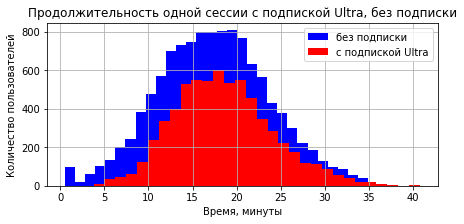

In [54]:
#Построим гистограмму для продолжительности одной сессии с подпиской и без подписки, в минутах
data_mrg_free['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='без подписки', color='blue')
data_mrg_ultra['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='с подпиской Ultra', color='red')

plt.title('Продолжительность одной сессии с подпиской Ultra, без подписки')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

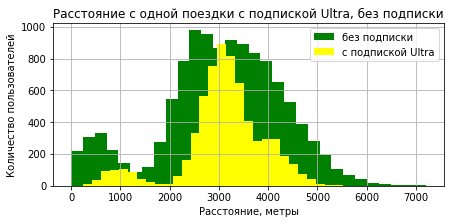

In [55]:
#Построим гистограмму для Расстояния одной сессии,в метрах
data_mrg_free['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='без подписки', color='green')
data_mrg_ultra['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='с подпиской Ultra', color='yellow')

plt.title('Расстояние с одной поездки с подпиской Ultra, без подписки')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

При анализе гистограммы "Продолжительность одной сессии с подпиской Ultra, без подписки" отмечаем на симетричное распределение гистограмм "с подпиской" и "без подписки". На гистограмме "без подписки" видны два пика: один из них в первые 2 минуты, второй в районе 17 минут. По первому пику можно отметить быстрое прекращение сесии в тарифе "без подписки" обосновав, что пользователь изначально не планировал длительное использование самоката или были дефекты в работе самоката, есть предположение, что в тарифе "по подписке" есть опция о работоспобности самокатов (заряде батареи).

При анализе гистограммы "Расстояние с одной поездки с подпиской Ultra, без подписки" отмечаем наличие двух пиков "колоколов", один из которых намного меньше или больше другого. Это может указывать на наличие двух или более различных групп в данных. Одна часть данных имеет более высокие или более низкие значения, чем другая часть. То есть это может указывать на наличие группы подписчиков, которые ездят на короткие дистанции, а часть подписчиков ездит на более длинные дистанции. Количество пользователей, использующих самокаты на длинные расстояния больше как среди пользователй "по подписке" и "без подписки".

**Вывод 4 шага.**

- Объединили данные о пользователях, поездках и подписках в один датафрейм. Всего 18068 пользователй.
- Создали два датафрейма для двух пользователей из созданного датафрейма.
- Построили гистограммы по информации о расстоянии и времени поездок для пользователей обеих категорий. Большая разница в количестве пользователй в зависимости от подписки явно видна на гистограммах.
- Среди пользователей "без подписки" около 100 пользователей в год имеют длительность  сесии около 2-х минут. Можно предположить, что пользователь изначально не планировал длительное использование самоката или были дефекты в работе самоката, так же есть предположение, что в тарифе "по подписке" есть опция о работоспобности самокатов (заряде батареи).
- Можем предположить на наличие группы подписчиков, которые ездят на короткие дистанции, и группы подписчиков, которые ездят на более длинные дистанции. Количество пользователей, использующих самокаты на длинные расстояния больше как среди пользователй "по подписке" и "без подписки". Возможно проведение дополнительного анализа двух данных групп среди обоих видов пользователей.

## Шаг. Подсчёт выручки

###  Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [56]:
# Округим каждое значение из столбца duration с помощью «потолка»: 
data_mrg['duration'] = np.ceil(data_mrg['duration'])
data_mrg['duration'] = data_mrg['duration'].astype('int')
display(data_mrg)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,20,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,22,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,19,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,17,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [57]:
#Создадим сводную таблицу mrg_agg
mrg_agg = data_mrg.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
mrg_agg.columns = ['_'.join(col) for col in mrg_agg.columns.values]
mrg_agg = mrg_agg.drop(columns=['count_duration'])
mrg_agg = mrg_agg.reset_index()
display(mrg_agg)

,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


###  В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

In [58]:
mrg_agg = mrg_agg.merge(users, how='left', on='user_id')
mrg_agg = mrg_agg.merge(subs, how = 'left', on='subscription_type')
display(mrg_agg)

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0


In [59]:
# Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь
def revenue(row):
    subscription_type = row['subscription_type'] 
    count = row['count_distance']
    duration = row['sum_duration']
    
    if subscription_type == 'ultra':
        rev = 0 * count + 6 * duration + 199
        return rev
    else:
        rev = 50 * count + 8 * duration + 0
        return rev
   


In [60]:
mrg_agg['revenue'] = mrg_agg.apply(revenue, axis=1)

In [61]:
mrg_agg

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Метод apply применяет функцию построчно, это может быть критично на больших данных, код будет работать очень долго. Тут оптимальнее будет посчитать выручку с помощью простых векторных операций со столбцами (арифметические действия).


Код всегда стоит писать более универсальным, без ручного внесения значений. В сводной таблице у нас уже есть все значения по тарифам для расчета выручки, мы сможем посчитать выручку простыми арифметическими действиями со столбцами сводной таблицы и формула будет единой для обеих групп пользователей.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вариант кода:

    def revenue(row):
    count = row['count_distance']
    duration = row['sum_duration']
    ultra_revenue = 6 * duration + 199
    free_revenue = 8 * duration
    return 0 if pd.isnull(row['subscription_type']) else (ultra_revenue if row['subscription_type'] == 'ultra' else free_revenue) * count
    </div>

In [62]:
display(mrg_agg)


,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


**Вывод 5 шага.**

- Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавлен столбец с помесячной выручкой, которую принес каждый пользователь.

## Шаг. Проверка гипотез

### Проверим, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- Используем датафреймы data_mrg_free и data_mrg_ultra. 
- Нулевая гипотеза: среднее время сесии пользователей с подпиской и пользователей без подписки равно.
- Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.

In [63]:
#Проведем двухвыборочный t-тест для независимых выборок
duration_free = data_mrg_free['duration']
duration_ultra = data_mrg_ultra['duration']

print(f'Среднее время сессии без подписки: {np.mean(duration_free)}')
print(f'Среднее время сессии по подписке: {np.mean(duration_ultra)}')

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(duration_free, duration_ultra, alternative='less')
print(f'p-значение: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее время сессии без подписки: 17.39090929866399
Среднее время сессии по подписке: 18.54198516280583
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Вывод: пользователи с подпиской тратят больше времени на поездки.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли  ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

- Используем датафреймы data_mrg_free и data_mrg_ultra.
- Нулевая гипотеза: среднее расстояние поездки пользователи с подпиской не превышает 3130 метров.
- Альтернативная гипотеза: среднее расстояние поездки пользователи с подпиской превышает 3130 метров.

In [64]:
#Проведем одновыборочный t-тест
#Среднее расстояние поездки пользователей по подписке
duration_mean = 3130

# уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(data_mrg_ultra['distance'], duration_mean, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [65]:
#Проверим значение дистанции пользователя по подписке
print('Среднее расстояние поездки пользователей по подписке:', round(data_mrg_ultra['distance'].mean(),0))

Среднее расстояние поездки пользователей по подписке: 3115.0


Вывод: среднее расстояние пользователя с подпиской за одну поездку действительно не превышает 3130 м.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

- Используем датафрейм mrg_agg.
- Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны.
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки.

In [66]:
#Проведем двухвыборочный t-тест для независимых выборок
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    mrg_agg.loc[mrg_agg['subscription_type'] == 'ultra', 'revenue'], 
    mrg_agg.loc[mrg_agg['subscription_type'] == 'free', 'revenue'], 
    alternative='greater')

print(f'p-значение: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [67]:
#Проверим вывод 
# Выберем данные только по пользователям с подпиской 'ultra'
ultra_data = mrg_agg[mrg_agg['subscription_type'] == 'ultra']
average_revenue_ultra = ultra_data['revenue'].mean()
print('Средняя помесячная выручка от пользователей с подпиской:', round(average_revenue_ultra, 2))
# Выберем данные только по пользователям без подписки
free_data = mrg_agg[mrg_agg['subscription_type'] == 'free']
average_revenue_free = free_data['revenue'].mean()
print('Средняя помесячная выручка от пользователей без подпски:', round(average_revenue_free, 2))

Средняя помесячная выручка от пользователей с подпиской: 362.79
Средняя помесячная выручка от пользователей без подпски: 328.64


Вывод: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки.

### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки этой гипотезы о снижении количества обращений в техподдержку после обновления серверов можно воспользоваться двусторонним t-тестом для зависимых выборок. Двустоонний t-тест позволяет сравнивать средние значения двух связанных групп, например, до и после вмешательства или изменений.

**Вывод 6 шага.**

 - пользователи с подпиской тратят больше времени на поездки;
 
 
 - среднее расстояние пользователей с подпиской за одну поездку действительно не превышает 3130 м.:
 - среднее расстояние поездки пользователей по подписке: 3115 м.;
 
 
 - помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки: 
 - от пользователя с подпиской - 362,79 руб., 
 - от пользователя без подписки - 328,64 руб..

**Общий вывод**

- Получили данные, что информация в датафреймах предоставлена по 8 городам, из которых самое большое количество пользователей в Пятигорске, наименьшее количество - в Москве.

- Пользователей с типом подписки "без подписки" больше, чем с "с подпиской Ultra".

- Наименьший возраст пользователя - 12 лет, наибольший возраст - 43 года, средний возраст 24,9 лет. 

- Максимальное расстояние, которое преодолели пользователи за сессию составляет 7211 м., минимальное - 0,85 м., среднее - 3070 м.Есть небольшой всплеск на дистанции 600 м., а так же большое средне отклонение, по которому можно предположить, что на длину сессии могут оказывать влияние маршрут (поездка до метро или остановки общественного транспорта, стоянки самокатов), погодные условия (использовали самокат для дистанции от остановки до остановки около дома), работоспособность самоката (самокат оказался с дефектом в работе и был возвращен на стоянку, не заряженная батарея), время суток (время в часы пик) и т.д.

- Максимальная продолжительность одной сессии составляет 40 минут, минимальная продолжительность - 0,5 минут, средняя продолжительность - 17,8 минут. Есть отклонение в 6, которое возникло по наличию небольшого количества длительных сессии. Но в основном самокат используют до 20 минут.

- Среди пользователей "без подписки" около 100 пользователей в год имеют длительность  сесии около 2-х минут. Предположим, что пользователь без подписки старался проехать максимальную дистанцию за одну минуту, потому что данный тариф предлагает "первую минуту бесплатно". Этим может быть объяснен данный пик в данных.

- Можем предположить на наличие группы подписчиков, которые ездят на короткие дистанции, и группы подписчиков, которые ездят на более длинные дистанции. Количество пользователей, использующих самокаты на длинные расстояния больше как среди пользователй "по подписке" и "без подписки". Возможно проведение дополнительного анализа двух данных групп среди обоих видов пользователей.

- Проверены гипотезы:
- пользователи с подпиской тратят больше времени на поездки;

- среднее расстояние пользователей с подпиской за одну поездку действительно не превышает 3130 м.:
- среднее расстояние поездки пользователей по подписке: 3115 м.;
    
- помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки:
- от пользователя с подпиской - 362,79 руб.,
- от пользователя без подписки - 328,64 руб..

## Шаг. Распределения

### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

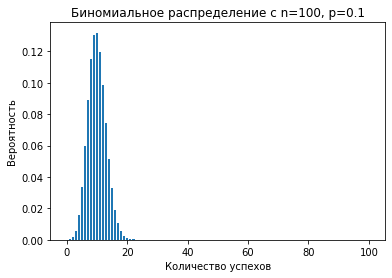

In [68]:
n = 100  # количество попыток
p = 0.1  # вероятность успеха

distr = [binom.pmf(k, n, p) for k in range(n + 1)]

plt.bar(range(n + 1), distr)
plt.title('Биномиальное распределение с n=100, p=0.1')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.show()

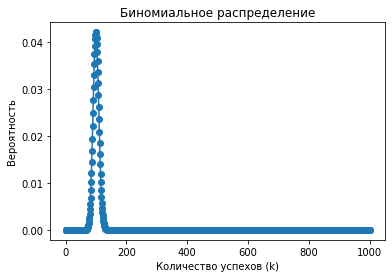

In [69]:
from math import factorial

n = 1000  # количество попыток
p = 0.1  # вероятность успеха
distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    distr.append(prob)

plt.plot(range(n+1), distr, marker='o')
plt.xlabel('Количество успехов (k)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.show()

Пик графика с вероятностью 5% при количестве успехов близким к 500 более вероятно не выполнить план.

In [70]:
for n in range (500,1500):
    if binom.cdf(99, n, p) < 0.05:
        print("Минимальное число промокодов:", n)
        break

Минимальное число промокодов: 1161


Вывод: для вероятности не выполнения плана менее 5% необходимо разослать минимум 1161 промокодов.

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

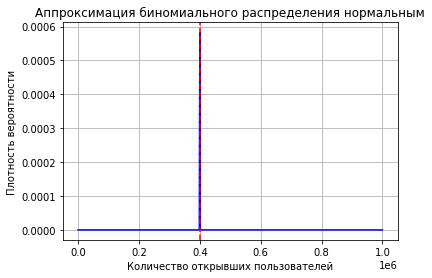

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.1537


In [71]:
from scipy.stats import norm

n = 1000000  # количество уведомлений
p = 0.4      # вероятность открытия уведомления
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Оценка вероятности
x = 399500
prob = norm.cdf(x, mu, sigma)

# Построение графика
x_values = np.linspace(0, n, 1000)
y_values = norm.pdf(x_values, mu, sigma)

plt.plot(x_values, y_values, color='blue')
plt.fill_between(x_values, y_values, where=(x_values <= x), color='skyblue', alpha=0.5)
plt.axvline(x, color='red', linestyle='--')
plt.xlabel('Количество открывших пользователей')
plt.ylabel('Плотность вероятности')
plt.title('Аппроксимация биномиального распределения нормальным')
plt.grid(True)
plt.show()

print(f'Вероятность того, что уведомление откроют не более {x} пользователей: {prob:.4f}')


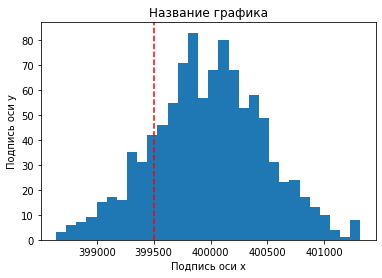

In [72]:
# Код, предложенный  ревьюером

s = np.random.normal(mu, sigma, 1000) # генерируем значения для нормального распределения


plt.hist(s, 30) # строим гистограмму
plt.axvline(399500, color='red', linestyle='--')
plt.title('Название графика')
plt.ylabel('Подпись оси y')
plt.xlabel('Подпись оси х')

plt.show()

Вывод: вероятность того, что уведомление откроют не более 399,5 тыс. пользователей при рассылке 1 млн.уведомлений составляет 15%.